# 뱅크 마케팅

타켓이 카테고리면 통계적 분석이 불가능하므로, 가능하다면 수치로 변경 - map
카테고리 컬럼을 다 그리기 - value_counts
카테고리 컬럼 그룹으로 묶어 데이터 확인 - groupby

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob

In [7]:
df = pd.read_csv('./datasets/bank/bank-full.csv', sep=';')
df.shape

(45211, 17)

In [8]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [9]:
df.y.value_counts()

no     39922
yes     5289
Name: y, dtype: int64

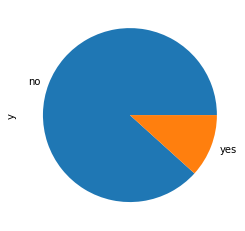

In [10]:
df.y.value_counts().plot.pie()

In [12]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [15]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


젊은 고객이 상품에 가입하는 가

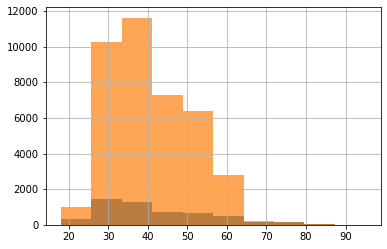

In [34]:
df[df['y']=='yes'].age.hist()
df[df['y']=='no'].age.hist(alpha=0.7)

집이 있는 고객이 상품을 가입하는가

In [54]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,ages
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,60.0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,50.0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,40.0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,50.0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,40.0


In [57]:
df.housing.value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

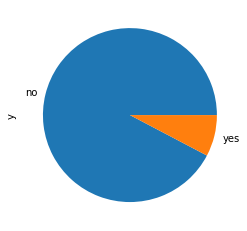

In [63]:
df[df.housing=='yes']['y'].value_counts().plot.pie()

결혼 상태에 따른 상품 가입률릉 어떤가

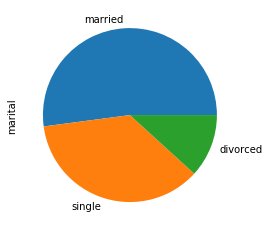

In [67]:
df[df['y']== 'yes'].marital.value_counts().plot.pie()

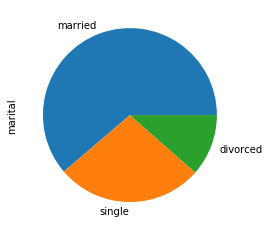

In [68]:
df[df['y']== 'no'].marital.value_counts().plot.pie()

In [72]:
# 가입여부 형변환
df.y = df.y.map({'yes':1, 'no':0})
df.y.unique()

array([0, 1], dtype=int64)

In [73]:
df.corr()

,age,balance,day,duration,campaign,pdays,previous,y,ages
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288,0.025155,0.963848
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674,0.052838,0.095801
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710,-0.028348,-0.004725
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203,0.394521,-0.007628
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855,-0.073172,0.006096
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820,0.103621,-0.022535
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000,0.093236,0.000483
y,0.025155,0.052838,-0.028348,0.394521,-0.073172,0.103621,0.093236,1.000000,0.024230
ages,0.963848,0.095801,-0.004725,-0.007628,0.006096,-0.022535,0.000483,0.024230,1.000000


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null int64
ages         45211 non-null float64
dtypes: float64(1), int64(8), object(9)
memory usage: 6.2+ MB


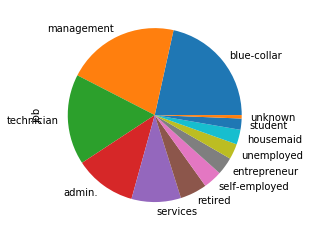

In [75]:
df.job.value_counts().plot.pie(figsize=(4,4))

In [77]:
df.groupby('job').mean()

,age,balance,day,duration,campaign,pdays,previous,y,ages
job,,,,,,,,,
admin.,39.289886,1135.838909,15.564301,246.896732,2.575324,47.859021,0.671630,0.122027,43.699478
blue-collar,40.044081,1078.826654,15.442561,262.901562,2.816995,44.033498,0.505138,0.072750,44.538635
entrepreneur,42.190989,1521.470074,15.702085,256.309348,2.799597,32.486214,0.478144,0.082717,46.711500
housemaid,46.415323,1392.395161,16.002419,245.825000,2.820968,21.505645,0.371774,0.087903,50.750000
management,40.449567,1763.616832,16.114189,253.995771,2.864348,38.665468,0.668006,0.137556,44.980968
retired,61.626767,1984.215106,15.439488,287.361307,2.346731,37.443905,0.638693,0.227915,65.344523
self-employed,40.484484,1647.970868,16.027866,268.157061,2.853072,34.747308,0.551615,0.118429,44.990500
services,38.740250,997.088108,15.635532,259.318729,2.718344,41.995185,0.501204,0.088830,43.182475
student,26.542644,1388.060768,14.897655,246.656716,2.299574,57.041578,0.953092,0.286780,30.948827
